In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df_all = pd.read_csv('../../dataset2001_2024.csv')  # ajuste o caminho do arquivo se necessário
df = df_all[df_all['YEAR'] == 2023]

        YEAR  MO  DY  HR  ALLSKY_SFC_UV_INDEX  ALLSKY_SRF_ALB  CLRSKY_KT  \
192840  2023   1   1   0                  0.0          -999.0     -999.0   
192841  2023   1   1   1                  0.0          -999.0     -999.0   
192842  2023   1   1   2                  0.0          -999.0     -999.0   
192843  2023   1   1   3                  0.0          -999.0     -999.0   
192844  2023   1   1   4                  0.0          -999.0     -999.0   

        CLOUD_AMT    T2M     PS    PW   WD10M   WD50M  WS50M  WS10M  \
192840      24.35  20.53  93.57  3.14  131.22  130.84   4.80   2.26   
192841      10.65  19.88  93.55  3.11  128.08  127.81   4.59   2.15   
192842       2.78  19.30  93.50  3.05  126.69  126.37   4.27   2.03   
192843      16.53  18.81  93.45  3.03  122.78  122.15   3.95   1.90   
192844      19.04  18.47  93.41  2.99  115.78  115.21   3.70   1.80   

        TOA_SW_DNI   QV2M  QV10M  
192840         0.0  15.50  15.44  
192841         0.0  15.14  15.08  
192842     

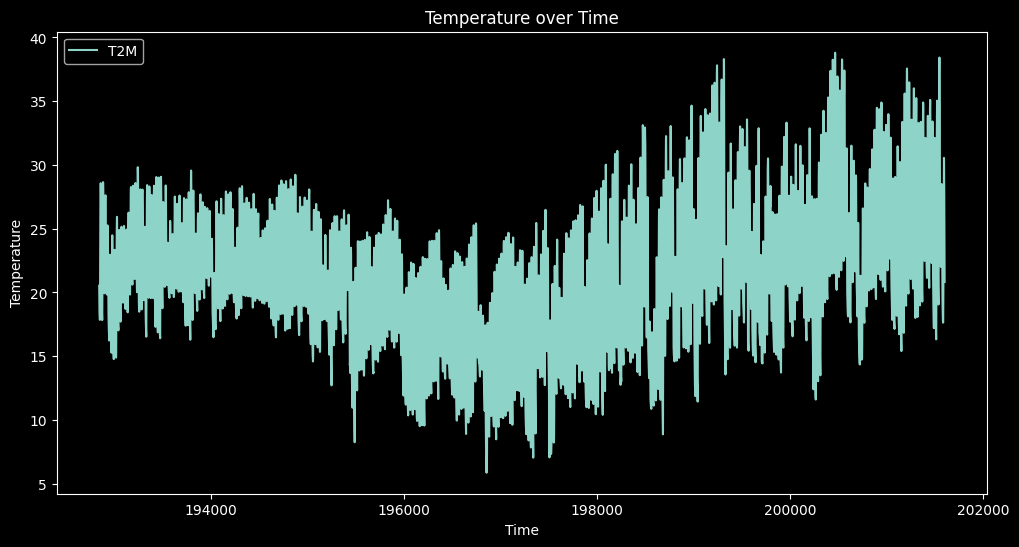

In [48]:
# Visualizar os primeiros dados
print(df.head())
print(df['T2M'].describe())

# Visualizar a série temporal da coluna T2M
plt.figure(figsize=(12, 6))
plt.plot(df['T2M'], label='T2M')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.legend()
plt.show()


In [49]:
# Número de atrasos para prever o próximo valor
lag = 1
df['T2M_Lag1'] = df['T2M'].shift(lag)

# Remover valores nulos gerados pela lag
df = df.dropna()

# Dividir em variáveis independentes (X) e variável dependente (y)
X = df[['T2M_Lag1']]
y = df['T2M']

# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


C:\Users\Natan Guedes\AppData\Local\Temp\ipykernel_28656\1086968262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T2M_Lag1'] = df['T2M'].shift(lag)


In [50]:
from sklearn.linear_model import LinearRegression

# Inicializar o modelo
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 1.0933226151494997
Mean Squared Error (MSE): 2.0282046904567115


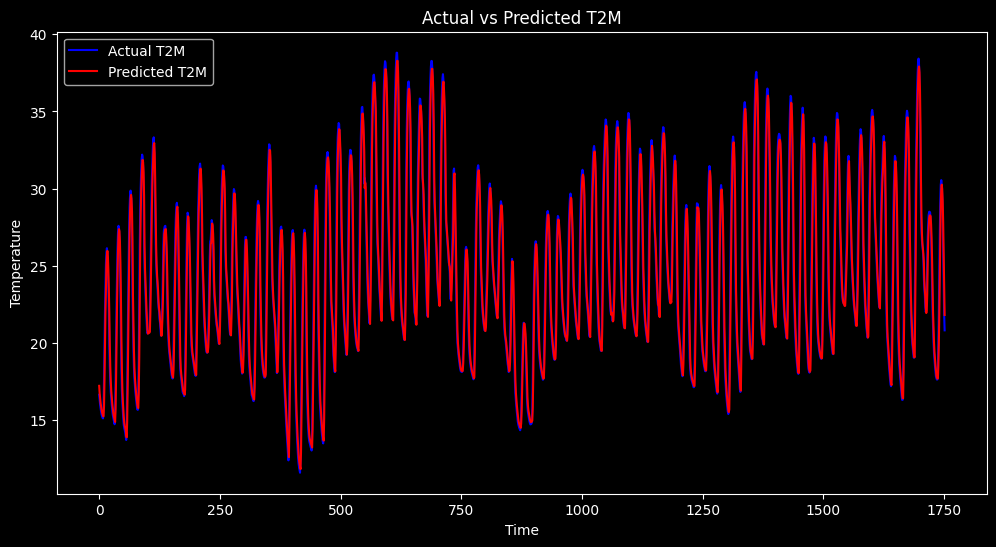

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='blue', label='Actual T2M')
plt.plot(y_pred, label='Predicted T2M', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted T2M')
plt.legend()
plt.show()
